In [8]:
# 한국 거래소 데이터 => 종목코드
# 네이버 금융에 특정 기업을 분석한다. 분석 대상은 신라젠이라는 기업.
# jupyter notebook은 반드시 크롬에서 실행한다.

import pandas as pd
# html에 있는 정보를 읽어온다.
# header = 0 으로 맨 윗줄의 데이터를 헤더로 사용하고 얻은 자료를 리스트 형태로 이용하기 위해 뒤에 [0] 을 붙여준다.
code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13', header=0)[0]
# 타입을 확인
print(type(code_df))  # <class 'pandas.core.frame.DataFrame'>
print(code_df.head())  # 데이터를 확인
# code_df에 있는 '종목코드' 컬럼을 0을 채운 6자리 포멧으로 맞춰준다.
code_df.종목코드 = code_df.종목코드.map('{:06d}'.format)
# code_df를 회사명과 종목코드 컬럼만 뽑아낸다.
#    ***참고*** pandas에서 컬럼을 선택 할 때
#                   단일개 선택: df['컬럼명']   or   df.컬럼명
#                   여러개 선택: df[['컬럼명', ... ,'컬럼명']]
code_df = code_df[['회사명', '종목코드']]
print(code_df.head())  # 데이터를 확인

# 한글로된 컬럼명을 영어로 바꿔준다.
code_df = code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})

# 신라젠 네이버 금융 주소.   http://finance.naver.com/item/main.nhn?code=215600
# 함수 생성 => 특정한 업체만 코드를 가져오기 위해서
def get_url(item_name, code_df):
    # 코드를 가져오기 위한 처리.
    # 먼저 .query("name=='{}'".format(item_name))['code']는 name 컬럼에 item_name과 동일한 값의 code값을 반환한다는 뜻.
    # 즉, .query("쿼리".format(쿼리에 넣을 데이터))[얻을 자료]
    # .to_string(index = False)로 위에서 얻어진 값에 index를 빼고 string타입으로 바꿔준다.
    code = code_df.query("name=='{}'".format(item_name))['code'].to_string(index = False)
    # url은 일일 종가 시가 고가 저가 거래량을 보여주는 표이다.
    url = 'http://finance.naver.com/item/sise_day.nhn?code={code}'.format(code = code)
    print("요청 URL = {}".format(url))
    return url

# 신라젠 정보 가져오기
item_name = '신라젠'
url = get_url(item_name, code_df)
df = pd.DataFrame()

print(df)

<class 'pandas.core.frame.DataFrame'>
     회사명   종목코드             업종                         주요제품         상장일  결산월  \
0     CJ   1040         기타 금융업                         지주회사  1973-06-29  12월   
1  CJ씨푸드  11150      기타 식품 제조업   수산물(어묵,맛살)가공품 도매,원양수산업,수출입  1988-11-26  12월   
2    HDC  12630         건물 건설업  토목공사,건축공사,아파트분양사업,재개발/재건축사업  1996-10-16  12월   
3  HSD엔진  82740  일반 목적용 기계 제조업               대형선박용엔진,내연발전엔진  2011-01-04  12월   
4  KG케미칼   1390    기초 화학물질 제조업    콘크리트혼화제, 비료, 친환경농자재, 수처리제  1989-08-25  12월   

             대표자명                         홈페이지     지역  
0   손경식, 이재현, 이채욱            http://www.cj.net  서울특별시  
1  박정훈, 이인덕(각자대표)     http://www.cjseafood.net    경기도  
2             정몽규        http://www.i-park.com  서울특별시  
3             고영열  http://www.doosanengine.com   경상남도  
4             김경묵      http://www.kgchem.co.kr  울산광역시  
     회사명    종목코드
0     CJ  001040
1  CJ씨푸드  011150
2    HDC  012630
3  HSD엔진  082740
4  KG케미칼  001390
요청 URL = http://finance.naver.com/item/sise

In [9]:

# 크롤링. 페이지 20까지 크롤링을 한다.
for page in range(1, 21):
    # 위에서 얻은 url에 page를 붙여줘서 url 포멧을 만들어준다.
    pg_url = '{url}&page={page}'.format(url = url, page = page)
    # pandas의 df에 위에서 얻은 url을 넣어줘서 우리가 구하고자 하는 데이터프레임을 만든다.
    # 데이터프레임을 만들 때 리스트에 [0]을 붙여줘서 만들 수 있음을 다시 확인.
    df = df.append(pd.read_html(pg_url, header = 0)[0], ignore_index= True)

# df.dropna()를 이용해 결측값(NaN) 있는 행을 제거한다.
df = df.dropna()
# 상위 5개 데이터 확인하기 
print(df.head())

# 한글로 된 컬럼명을 영어로 바꿔준다.
df = df.rename(columns= {'날짜': 'date', '종가': 'close', '전일비': 'diff',
    '시가': 'open', '고가': 'high', '저가': 'low', '거래량': 'volume'})
# 데이터의 타입을 int형으로 바꿔줌. \(역슬래쉬)는 뒤에 데이터가 이어진다는 의미이다. 한줄로 쓰면 \ 필요없음.
df[['close', 'diff', 'open', 'high', 'low', 'volume']] = df[['close', 'diff', 'open', 'high', 'low', 'volume']].astype(int)
# 컬럼명 'date'의 타입을 date로 바꿔줌
df['date'] = pd.to_datetime(df['date'])
#  일자(date)를 기준으로 오름차순 정렬
df = df.sort_values(by=['date'], ascending=True)
# 상위 5개 데이터 확인
print(df.head())
print(df['date'])



           날짜       종가     전일비       시가       고가       저가        거래량
1  2018.12.17  73800.0  5200.0  78700.0  78900.0  70900.0  1797491.0
2  2018.12.14  79000.0  1800.0  80300.0  82800.0  77400.0  2162227.0
3  2018.12.13  80800.0   700.0  80100.0  81700.0  78500.0  1642763.0
4  2018.12.12  80100.0  2600.0  78300.0  80200.0  77900.0  1218077.0
5  2018.12.11  77500.0  4300.0  82300.0  82900.0  77100.0  2287223.0
          date   close  diff    open    high     low   volume
298 2018-02-23   98800  4000  107000  108500   98800  5435343
297 2018-02-26   99100   300   99000  101200   98100  1688989
296 2018-02-27  100300  1200  100500  103000   99900  2153382
295 2018-02-28  102400  2100   99400  102900   99400  2398496
294 2018-03-02  105600  3200  101300  107000  100700  3074091
298   2018-02-23
297   2018-02-26
296   2018-02-27
295   2018-02-28
294   2018-03-02
290   2018-03-05
289   2018-03-06
288   2018-03-07
287   2018-03-08
286   2018-03-09
283   2018-03-12
282   2018-03-13
281   2018

In [10]:
# 시각화 파트
!pip install plotly

# jupyter notebook 에서 출력. 꼭 jupyter notebook에서 해야한다.
# 만약 jupyter notebook에서 출력하기 싫다면 아래에 적어놓는 방법을 이용하자.
!plotly
import plotly.offline as offline
import plotly.graph_objs as go

# plotly 접속
offline.init_notebook_mode(connected=True)
# 그래프를 생성. x축에는 날짜, y축에는 종가, 그래프 이름은 item_name에서 가져온다.
trace = go.Scatter(x=df.date, y=df.close, name=item_name)
# 위에 데이터 정보를 data라는 객체의 리스트로 담아준다.
data = [trace]
# 레이아웃 잡기
layout = dict(title='{}의 종가(close) Time Series'.format(item_name),  # 타이틀 생성.
              xaxis=dict(
                  rangeselector=dict(
                      buttons=list([  # 한 달, 세 달, 6달, 전체 종가를 보여주는 버튼을 만든다.
                          dict(
                              count=1,  # 1개씩 센다. 여기서는 step='month'이기 때문에 1달이 된다.
                              label='1m',  # 라벨 이름. 그래프에 1m이라는 버튼을 만든다.
                              step='month',  # 한 달을 기준으로 잡아서 count를 센다.
                              stepmode='backward'),  # 가장 최근 데이터부터 센다. forward는 가장 오래된 데이터부터 센다.
                          dict(
                              count=3,
                              label='3m',
                              step='month',
                              stepmode='backward'),
                          dict(
                              count=6,
                              label='6m',
                              step='month',
                              stepmode='backward'),
                          dict(
                              step='all') ]) ),  # 전체 데이터를 출력한다. step='all'은 label을 설정할 수 없다.
                  rangeslider=dict(),
                  type='date'
                      )
              )
# graph object에 data, layout을 저장한다.
fig = go.Figure(data=data, layout=layout)
# 플롯을 출력한다.
offline.iplot(fig)



'plotly'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


[*********************100%***********************]  1 of 1 downloaded


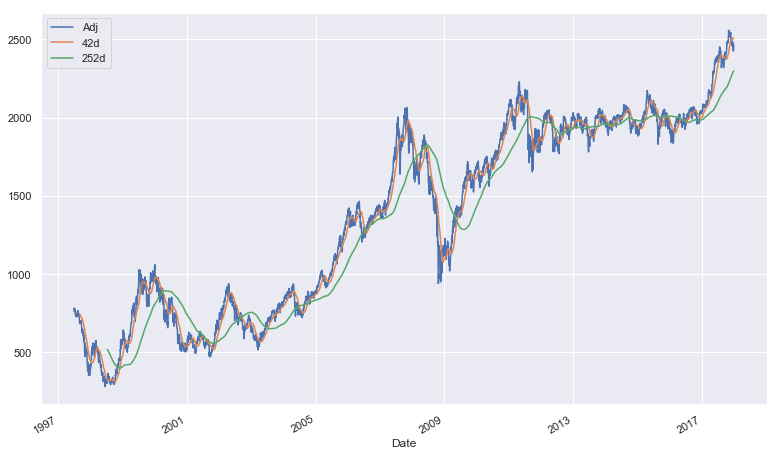

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas_datareader.data as web
import fix_yahoo_finance as yf
yf.pdr_override()

kospi = web.get_data_yahoo('^KS11',start='1997-07-01',end='2017-12-31')

kospi['Adj'] = kospi['Adj Close']
kospi.drop('Adj Close', axis = 1)

'''42일 이동평균선과 252일 이동평균선 그리기'''
kospi['42d'] = kospi[ 'Adj' ].rolling(window=42).mean()
kospi['252d'] = kospi[ 'Adj' ].rolling(window=252).mean()


kospi[['Adj','42d','252d']].plot(figsize=(13,8))


[*********************100%***********************]  1 of 1 downloaded


Text(0.5,1,'Arithmetic Return')

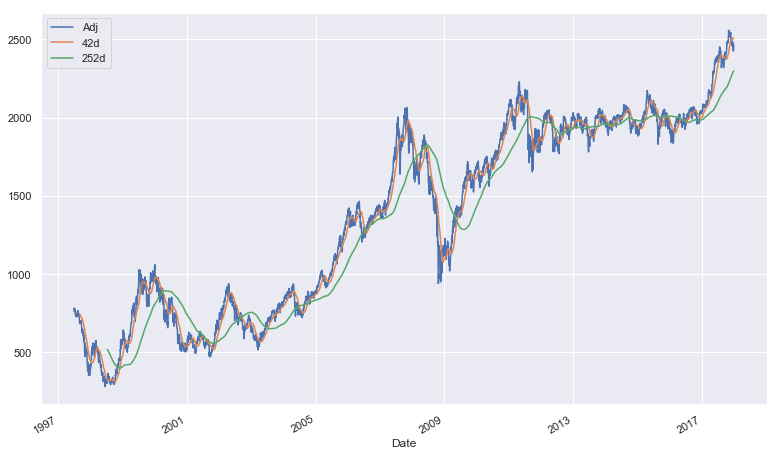

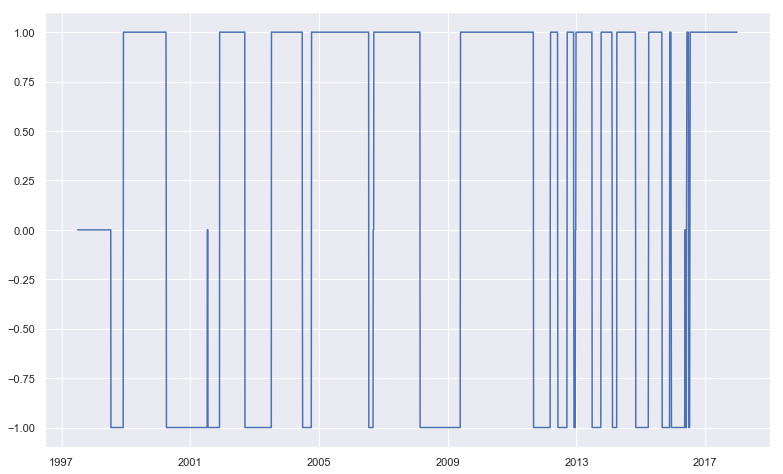

<Figure size 432x288 with 0 Axes>

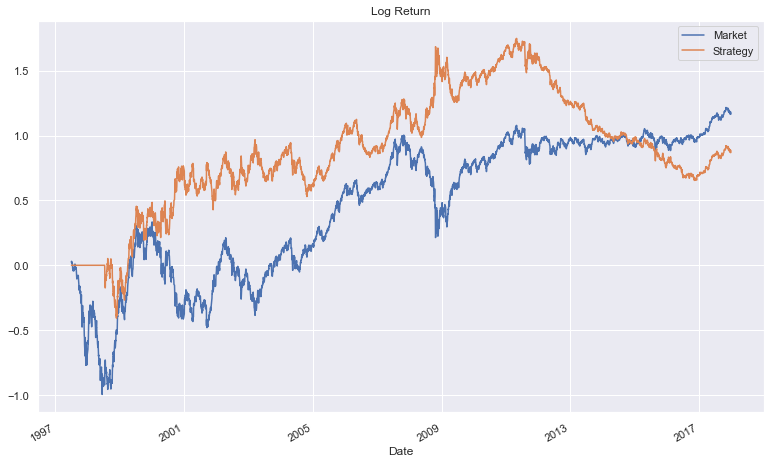

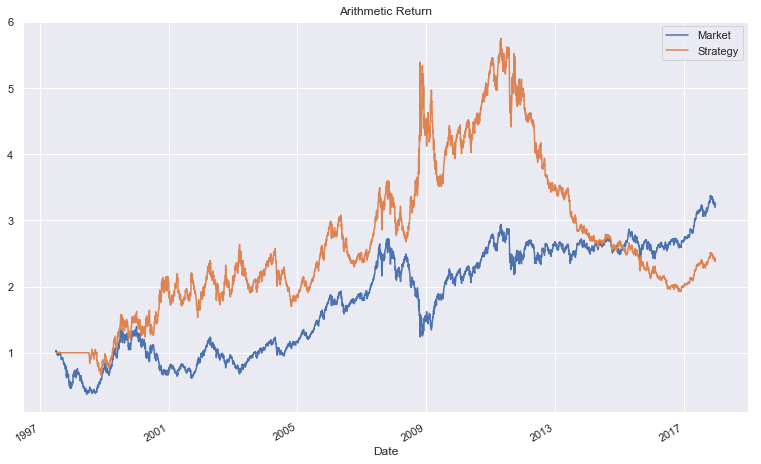

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas_datareader as web
import fix_yahoo_finance as yf
yf.pdr_override()



'''코스피 데이터 가져오기'''
kospi = pdr.get_data_yahoo('^KS11',start='1997-07-01',end='2017-12-31')

kospi['Adj'] = kospi['Adj Close']
kospi.drop('Adj Close', axis = 1)

'''42일 이동평균선과 252일 이동평균선 그리기'''
kospi['42d'] = kospi[ 'Adj' ].rolling(window=42).mean()
kospi['252d'] = kospi[ 'Adj' ].rolling(window=252).mean()

kospi[['Adj','42d','252d']].plot(figsize=(13,8))



''' 매수 신호(ETF 매수)
    [42d] - [252d] > SD           42일 추세가 252일 추세보다 SD값 만큼 위에 도달하였을 때  

    대기 신호(현금 보유)
    -SD < [42d] - [252d] < SD     42일 추세가 252일 추세의 위 아래 SD값 사이에 있을 때

    매도 신호(ETF 인버스 매수)
    [42d] - [252d] < - SD         42일 추세가 252일 추세보다 SD값 만큼 아래에 도달하였을 때
    
    매수 매도 신호를 혼동하지 않고 너무 잦은 거래를 방지하기 위해 SD (신호임계값)을 추가해준다. '''


SD = 1 #신호 임계값 : 60

kospi['Spread'] = kospi['42d']-kospi['252d']

'''매매 구간 설정하기'''
kospi['Regime'] = np.where(kospi['Spread']>SD,1,0)
kospi['Regime'] = np.where(kospi['Spread']<-SD , -1, kospi['Regime'])

#print(kospi['Regime'].value_counts())
#print(kospi['Regime'].tail(100))
plt.figure(figsize=(13,8))
plt.plot(kospi['Regime'])


'''수익률 계산하기'''
kospi['Market'] = np.log(kospi['Adj'] / kospi['Adj'].shift(1))
kospi['Strategy'] = kospi['Market'] * kospi['Regime'].shift(1)

plt.figure()
kospi[['Market','Strategy']].cumsum().plot(figsize=(13,8))
plt.title('Log Return')

plt.figure
kospi[['Market','Strategy']].cumsum().apply(np.exp).plot(figsize=(13,8))
plt.title('Arithmetic Return')


